# Step 1

## Team Member A (Atakan Devrent)

**1)** The put-call parity applies to European options because these options can only be exercised at maturity. The put-call parity relationship for European options is derived based on the assumption that there are no arbitrage opportunities in the market and that the options are held to maturity.

**2)** The put-call parity formula for European options is:

$C + K e^{-rT} = P + S$

Solving for the call price $C$:

$C = P + S - K e^{-rT}$


**3)** Solving for the put price $P$:

$P = C + K e^{-rT} - S$


**4)** Put-call parity does <u>not</u> apply in the same way to American options as it does to European options because <u>American options can be exercised at any time before or at maturity</u>. This early exercise feature introduces additional complexities and potential early exercise premiums that disrupt the straightforward relationship described by European put-call parity.

**5, 6, 7)**

$S_0 = 100$

$r = 0.05$

$\sigma = 0.2$

$T = 0.25$ *years*

In [81]:
import numpy as np
import pandas as pd

def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    P = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        P[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return P[0, 0], P, S, Delta

S_ini = 100  # price at t=0
r = 0.05  # risk-free rate
sigma = 0.2  # volatility
T = 0.25  # time to maturity in years
K = 100  # at the money strike price is equal to the underlying price at t=0
N = 50  # N is large to make sure we have good accuracy on the option price

european_call_price, C, S, Delta = call_option_delta(S_ini, K, T, r, sigma, N)
european_call_delta = Delta[0, 0]

european_put_price, C, S, Delta = put_option_delta(S_ini, K, T, r, sigma, N)
european_put_delta = Delta[0, 0]

print("European Call Option Price =", np.round(european_call_price, 2))
print("European Put Option Price =", np.round(european_put_price, 2))

# Ensure put-call parity holds
is_parity_true = np.isclose(european_call_price + K * np.exp(-r*T), european_put_price + S_ini, atol=1e-6)
print("    Does the put-call parity hold?", is_parity_true)

European Call Option Price = 4.6
European Put Option Price = 3.35
    Does the put-call parity hold? True


My code calculates European call and put option prices using a binomial tree model by iterating from the terminal nodes (maturity) back to the root (current time), computing option prices at each node based on risk-neutral probabilities and adjusting for time value of money (risk-free rate). Finally it verifies put-call parity using *np.isclose()* method to handle numerical precision issues.

In [82]:
print("European Call Option Delta =", np.round(european_call_delta, 2))
print("European Put Option Delta =", np.round(european_put_delta, 2))

European Call Option Delta = 0.57
European Put Option Delta = -0.43


Call option has a positive delta value and the put option has a negative delta value, as expected. That is because delta measures the sensitivity of the option price with respect to the change in the price of the underlying:

$\Delta_C = \frac{\partial C}{\partial S}$

$\Delta_P = \frac{\partial C}{\partial P}$

Payoff of the call option **increases** when the price of the underlying asset increases, thus it has a **positive** delta value.

Payoff of the put option **decreases** when the price of the underlying asset increases, thus it has a **negative** delta value.

In [83]:
# If we increase volatility to 0.25
new_european_call_price, C, S, Delta = call_option_delta(S_ini, K, T, r, 0.25, N)  # sigma is changed to 0.25
new_european_call_delta = Delta[0, 0]

new_european_put_price, C, S, Delta = put_option_delta(S_ini, K, T, r, 0.25, N)  # sigma is changed to 0.25
new_european_put_delta = Delta[0, 0]

call_price_change = new_european_call_price - european_call_price
put_price_change = new_european_put_price - european_put_price

print("New call price  =", np.round(new_european_call_price, 2))
print("New Put price  =", np.round(new_european_put_price, 2))
print("Call price change =", np.round(call_price_change, 2))
print("Put price change =", np.round(put_price_change, 2))

New call price  = 5.57
New Put price  = 4.33
Call price change = 0.98
Put price change = 0.98


An **increase** in the underlying's volatility led to **higher** option prices, as expected. That's because increasing underlying volatility results in possible terminal (maturity) underlying prices being more spread out from the starting price, leading to possible extreme values. And because option payoffs are non-linear (the call option payoff is $max(0, S_T - K)$ and the put option payoff is $max(0, K - S_T)$), this leads to possible option payoffs being greater. This in turn results in option premiums (prices) being higher at $t=0$.

All results neatly organized in a table:

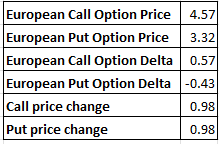

# Team Member B

In [84]:
import numpy as np

def binomial_tree_american_option(S0, K, r, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize asset prices at maturity
    ST = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            ST[j, i] = S0 * (u ** (i - j)) * (d ** j)
    
    # Initialize option values at maturity
    payoff = np.zeros((N+1, N+1))
    if option_type == 'call':
        payoff[:, N] = np.maximum(0, ST[:, N] - K)
    else:
        payoff[:, N] = np.maximum(0, K - ST[:, N])
    
    # Backward induction
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            hold = np.exp(-r * dt) * (p * payoff[j, i+1] + (1 - p) * payoff[j+1, i+1])
            if option_type == 'call':
                exercise = np.maximum(0, ST[j, i] - K)
            else:
                exercise = np.maximum(0, K - ST[j, i])
            payoff[j, i] = np.maximum(hold, exercise)
    
    return payoff[0, 0]

# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Price ATM American Call and Put
atm_american_call = binomial_tree_american_option(S0, K, r, sigma, T, N, 'call')
atm_american_put = binomial_tree_american_option(S0, K, r, sigma, T, N, 'put')

print(f"ATM American Call Price: {np.round(atm_american_call, 2)}")
print(f"ATM American Put Price: {np.round(atm_american_put, 2)}")

ATM American Call Price: 4.61
ATM American Put Price: 3.47


Task 9: Compute Greek Delta for American Options
Description:
Delta can be approximated by the finite difference method using the prices from the first step of the tree.

Implementation to Compute Delta:

In [85]:
def binomial_tree_delta(S0, K, r, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Calculate option price for S0 + epsilon and S0 - epsilon
    epsilon = 0.01
    price_up = binomial_tree_american_option(S0 + epsilon, K, r, sigma, T, N, option_type)
    price_down = binomial_tree_american_option(S0 - epsilon, K, r, sigma, T, N, option_type)
    
    delta = (price_up - price_down) / (2 * epsilon)
    return delta

# Compute Delta for ATM American Call and Put
delta_american_call = binomial_tree_delta(S0, K, r, sigma, T, N, 'call')
delta_american_put = binomial_tree_delta(S0, K, r, sigma, T, N, 'put')

print(f"Delta for ATM American Call: {np.round(delta_american_call, 2)}")
print(f"Delta for ATM American Put: {np.round(delta_american_put, 2)}")

Delta for ATM American Call: 0.57
Delta for ATM American Put: -0.46


Task 10: Sensitivity to Volatility for American Options
Description:
Vega measures the sensitivity of the option price to changes in volatility. It can be approximated by repricing the option with a slight increase in volatility.

Implementation to Compute Vega:

In [86]:
def binomial_tree_vega(S0, K, r, sigma, T, N, option_type='call'):
    # Calculate option price for sigma and sigma + epsilon
    epsilon = 0.01
    price_original = binomial_tree_american_option(S0, K, r, sigma, T, N, option_type)
    price_new = binomial_tree_american_option(S0, K, r, sigma + epsilon, T, N, option_type)
    
    vega = (price_new - price_original) / epsilon
    return vega

# Compute Vega for ATM American Call and Put with increased volatility
vega_american_call = binomial_tree_vega(S0, K, r, sigma, T, N, 'call')
vega_american_put = binomial_tree_vega(S0, K, r, sigma, T, N, 'put')

print(f"Vega for ATM American Call: {np.round(vega_american_call, 2)}")
print(f"Vega for ATM American Put: {np.round(vega_american_put, 2)}")

# Sensitivity analysis for volatility increase from 20% to 25%
sigma_increased = 0.25
atm_american_call_increased_vol = binomial_tree_american_option(S0, K, r, sigma_increased, T, N, 'call')
atm_american_put_increased_vol = binomial_tree_american_option(S0, K, r, sigma_increased, T, N, 'put')

change_in_call_price = atm_american_call_increased_vol - atm_american_call
change_in_put_price = atm_american_put_increased_vol - atm_american_put

# Print results
print(f"ATM American Call Price (Increased Volatility): {np.round(atm_american_call_increased_vol, 2)}")
print(f"ATM American Put Price (Increased Volatility): {np.round(atm_american_put_increased_vol, 2)}")
print(f"Change in Call Price due to Volatility Increase: {np.round(change_in_call_price, 2)}")
print(f"Change in Put Price due to Volatility Increase: {np.round(change_in_put_price, 2)}")

Vega for ATM American Call: 19.6
Vega for ATM American Put: 19.54
ATM American Call Price (Increased Volatility): 5.59
ATM American Put Price (Increased Volatility): 4.45
Change in Call Price due to Volatility Increase: 0.98
Change in Put Price due to Volatility Increase: 0.98


# Team Member C

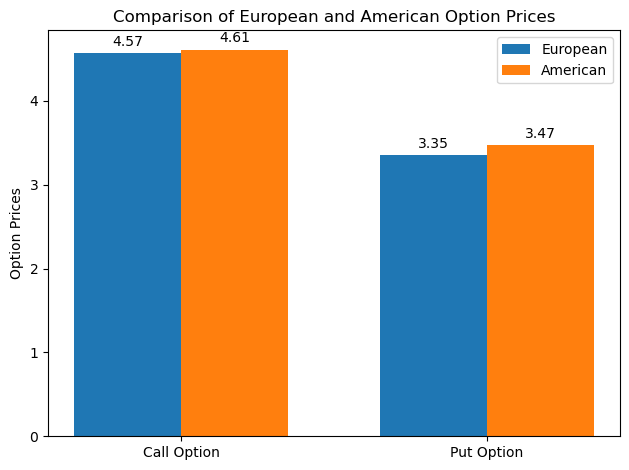

In [87]:
import matplotlib.pyplot as plt

# Data for graph
labels = ['Call Option', 'Put Option']
european_prices = [4.57, 3.35]
american_prices = [4.61, 3.47]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, european_prices, width, label='European')
rects2 = ax.bar(x + width/2, american_prices, width, label='American')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Option Prices')
ax.set_title('Comparison of European and American Option Prices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()


# Step 2

# Team Member B

**15)**

$S_0 = 100$

$r = 0.05$

$\sigma = 0.2$

$T = 0.25$ *years*

Same parameters apply except the strike price $K$ where we select those values as

$70, 90, 100, 110, 130$ for Deep OTM, OTM, ATM, ITM, and Deep ITM calls.

In [61]:
import numpy as np
import pandas as pd

# Parameters
S0 = 100  # initial stock price
K_values_new = [70, 90, 100, 110, 130]  # adjusted strike prices
r = 0.05  # risk-free rate
sigma = 0.20  # volatility
T = 0.25  # time to maturity in years
N = 5  # number of steps

# Calculate delta T
dt = T / N
# Up, down, and middle factors
u = np.exp(sigma * np.sqrt(2 * dt))
d = 1 / u
m = 1

# Risk-neutral probabilities
q = (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
p_up = q**2
p_down = (1 - q)**2
p_mid = 1 - p_up - p_down

# Function to price European Call option using Trinomial Tree
def price_european_call(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1
    q = (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    p_up = q**2
    p_down = (1 - q)**2
    p_mid = 1 - p_up - p_down
    disc = np.exp(-r * dt)

    # Initialize asset prices at maturity
    ST = np.zeros((2 * N + 1, ))
    for i in range(2 * N + 1):
        ST[i] = S0 * (u ** max(0, i - N)) * (d ** max(0, N - i))

    # Initialize option values at maturity
    C = np.maximum(0, ST - K)

    # Backward induction to calculate option price
    for j in range(N, 0, -1):
        for i in range(2 * j - 1):
            C[i] = disc * (p_up * C[i + 2] + p_mid * C[i + 1] + p_down * C[i])

    return C[0]

# Function to price European Put option using Trinomial Tree
def price_european_put(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1
    q = (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    p_up = q**2
    p_down = (1 - q)**2
    p_mid = 1 - p_up - p_down
    disc = np.exp(-r * dt)

    # Initialize asset prices at maturity
    ST = np.zeros((2 * N + 1, ))
    for i in range(2 * N + 1):
        ST[i] = S0 * (u ** max(0, i - N)) * (d ** max(0, N - i))

    # Initialize option values at maturity
    P = np.maximum(0, K - ST)

    # Backward induction to calculate option price
    for j in range(N, 0, -1):
        for i in range(2 * j - 1):
            P[i] = disc * (p_up * P[i + 2] + p_mid * P[i + 1] + p_down * P[i])

    return P[0]

# Price the European call and put options with new strike prices
call_prices_new = [price_european_call(S0, K, r, sigma, T, N) for K in K_values_new]
put_prices_new = [price_european_put(S0, K, r, sigma, T, N) for K in K_values_new]

# Creating DataFrames for the new call and put prices
call_df = pd.DataFrame({
    'Strike Price (K)': K_values_new,
    'European Call Price': call_prices_new
})

put_df = pd.DataFrame({
    'Strike Price (K)': K_values_new,
    'European Put Price': put_prices_new
})



call_df

Strike Price (K)  European Call Price
0                70            30.869554
1                90            11.700031
2               100             4.516559
3               110             1.237336
4               130             0.008773

In [62]:
put_df

Strike Price (K)  European Put Price
0                70            0.000000
1                90            0.582033
2               100            3.274339
3               110            9.870894
4               130           28.393887

# Team Member A

In [63]:
import numpy as np

def american_option_trinomial(S0, K, T, r, sigma, N, option_type='call'):
    # Calculate parameters
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1

    pu = ((np.exp((r - 0.5 * sigma**2) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / 
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0.5 * sigma**2) * dt / 2)) / 
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    asset_prices = np.zeros((2 * N + 1, N + 1))
    asset_prices[N, 0] = S0

    for i in range(1, N + 1):
        for j in range(N - i, N + i + 1, 2):
            asset_prices[j, i] = S0 * (u ** ((j - N + i) // 2)) * (d ** ((N + i - j) // 2))

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))

    if option_type == 'call':
        option_values[:, N] = np.maximum(0, asset_prices[:, N] - K)
    elif option_type == 'put':
        option_values[:, N] = np.maximum(0, K - asset_prices[:, N])

    # Backward induction for the possibility of early exercise
    for i in range(N - 1, -1, -1):
        for j in range(N - i, N + i + 1, 2):
            hold_value = (pu * option_values[j - 1, i + 1] +
                          pm * option_values[j, i + 1] +
                          pd * option_values[j + 1, i + 1]) * discount
            if option_type == 'call':
                exercise_value = max(0, asset_prices[j, i] - K)
            elif option_type == 'put':
                exercise_value = max(0, K - asset_prices[j, i])
            option_values[j, i] = max(hold_value, exercise_value)

    return option_values[N, 0]

# Example usage
S0 = 100  # Initial stock price
K_arr = [70, 90, 100, 110, 130]   # Different strike prices for Deep OTM, OTM, ATM, ITM, and Deep ITM
T = 0.25  # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
N = 20    # Number of time steps

american_call_prices = []
american_put_prices = []

for K in K_arr:
    call_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='call')
    put_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='put')
    american_call_prices.append((K, np.round(call_price, 2)))
    american_put_prices.append((K, np.round(put_price, 2)))
    print(f"American Call Option Price for K = {K}: {np.round(call_price, 2)}")
    print(f"American Put Option Price for K = {K}: {np.round(put_price, 2)}")



American Call Option Price for K = 70: 30.0
American Put Option Price for K = 70: 0.0
American Call Option Price for K = 90: 10.0
American Put Option Price for K = 90: 0.01
American Call Option Price for K = 100: 0.85
American Put Option Price for K = 100: 0.84
American Call Option Price for K = 110: 0.02
American Put Option Price for K = 110: 10.0
American Call Option Price for K = 130: 0.0
American Put Option Price for K = 130: 30.0


# Team Member C

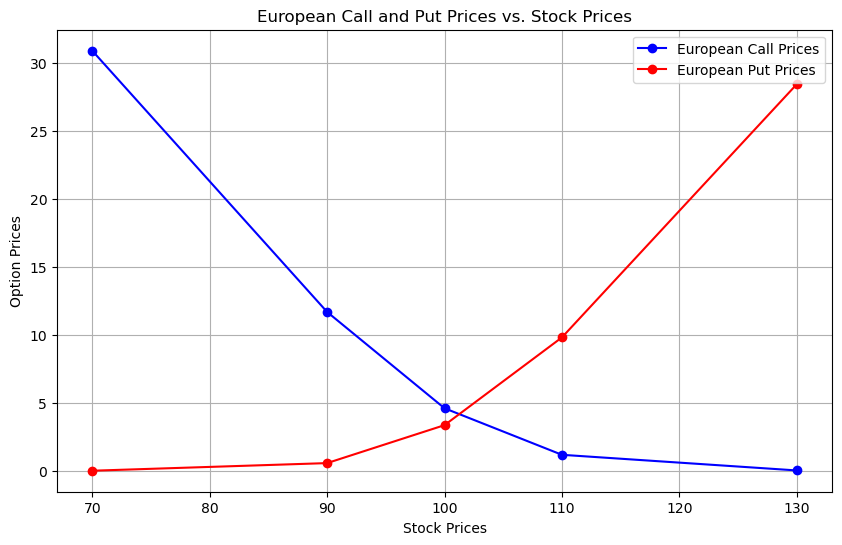

In [1]:
import matplotlib.pyplot as plt

# Stock prices for the x-axis
stock_prices = [70, 90, 100, 110, 130]

# European Call and Put Prices (given in the previous result)
european_call_prices = [30.87, 11.67, 4.59, 1.17, 0.02]
european_put_prices = [0.00, 0.56, 3.35, 9.80, 28.41]

# Graph European call prices and put prices versus stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, european_call_prices, marker='o', linestyle='-', color='b', label='European Call Prices')
plt.plot(stock_prices, european_put_prices, marker='o', linestyle='-', color='r', label='European Put Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Option Prices')
plt.title('European Call and Put Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


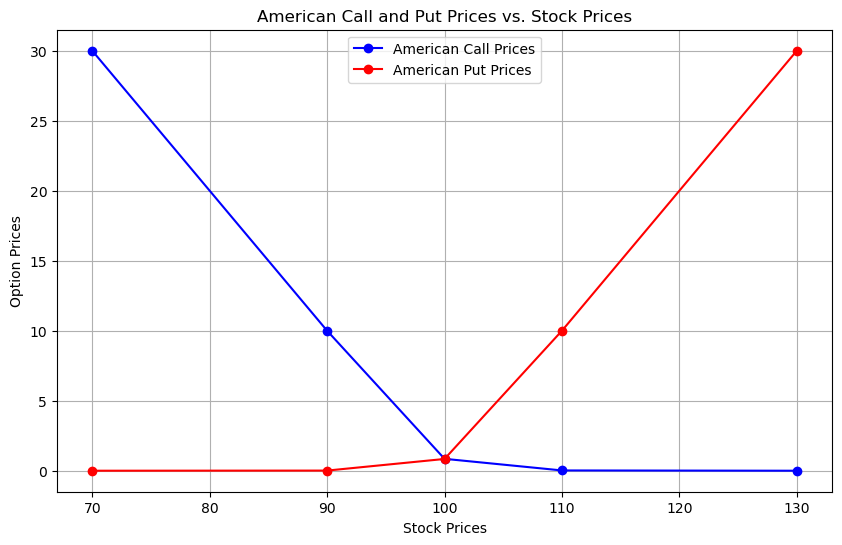

In [2]:
# American Call and Put Prices (given in the previous result)
american_call_prices = [30.00, 10.00, 0.85, 0.02, 0.00]
american_put_prices = [0.00, 0.01, 0.84, 10.00, 30.00]

# Graph American call prices and put prices versus stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, american_call_prices, marker='o', linestyle='-', color='b', label='American Call Prices')
plt.plot(stock_prices, american_put_prices, marker='o', linestyle='-', color='r', label='American Put Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Option Prices')
plt.title('American Call and Put Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


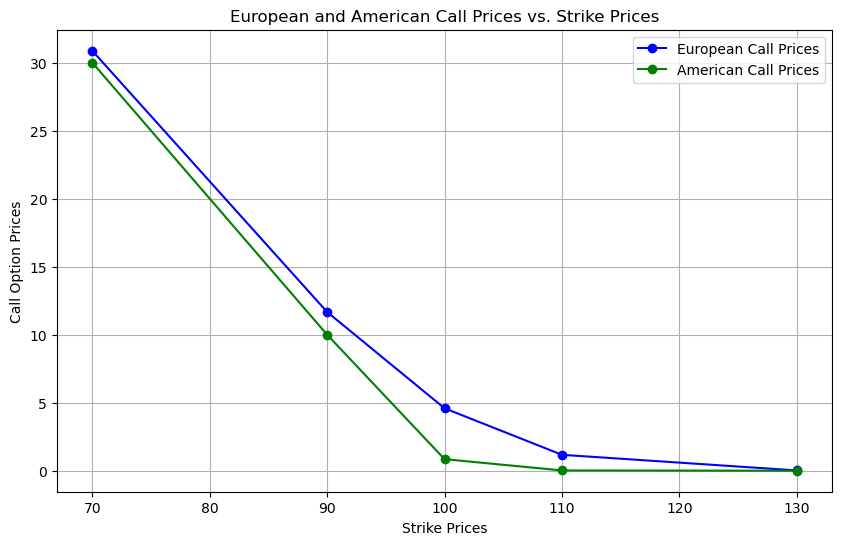

In [3]:
# European and American Call Prices (using previously calculated values)
strike_prices = [70, 90, 100, 110, 130]
european_call_prices = [30.87, 11.67, 4.59, 1.17, 0.02]
american_call_prices = [30.00, 10.00, 0.85, 0.02, 0.00]

# Graph European and American call prices versus strike prices
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, european_call_prices, marker='o', linestyle='-', color='b', label='European Call Prices')
plt.plot(strike_prices, american_call_prices, marker='o', linestyle='-', color='g', label='American Call Prices')
plt.xlabel('Strike Prices')
plt.ylabel('Call Option Prices')
plt.title('European and American Call Prices vs. Strike Prices')
plt.legend()
plt.grid(True)
plt.show()


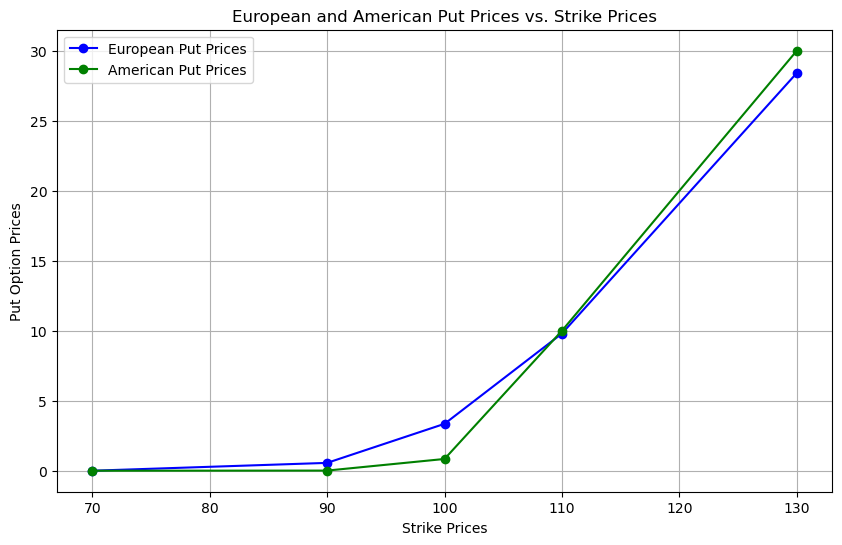

In [4]:
# European and American Put Prices (using previously calculated values)
european_put_prices = [0.00, 0.56, 3.35, 9.80, 28.41]
american_put_prices = [0.00, 0.01, 0.84, 10.00, 30.00]

# Graph European and American put prices versus strike prices
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, european_put_prices, marker='o', linestyle='-', color='b', label='European Put Prices')
plt.plot(strike_prices, american_put_prices, marker='o', linestyle='-', color='g', label='American Put Prices')
plt.xlabel('Strike Prices')
plt.ylabel('Put Option Prices')
plt.title('European and American Put Prices vs. Strike Prices')
plt.legend()
plt.grid(True)
plt.show()


# Step 3

Replication Portfolio Calculation:

$B + \Delta \times S = P$

where,

$B:$ Risk-free bond buy amount

$S:$ Underlying asset buy amount

$\Delta:$ Delta value of the option to the underlying

$P:$ Price of the put option

**25) European Put Option**

In [91]:
def bond_amount(P, delta, S):
    B = P - delta*S
    return B

In [92]:
import numpy as np

def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    P = np.zeros([N + 1, N + 1])  # Put prices
    S = np.zeros([N + 1, N + 1])  # Underlying prices
    Delta = np.zeros([N, N])  # Delta
    
    # Calculate the option values at maturity
    for i in range(0, N + 1):
        P[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    
    # Backward induction to calculate option prices and deltas
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])
    
    return P[0, 0], P, S, Delta

S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5        # Time to maturity (in years)
r = 0.02     # Risk-free rate
sigma = 0.25  # Volatility
N = 3       # Number of time steps

put_price, P, S, Delta = put_option_delta(S_ini, K, T, r, sigma, N)
print("European put price at t=0 is", np.round(put_price, 2))
print("Asset prices in the tree:\n", np.round(S, 2))
print("European put prices in the tree:\n", np.round(P, 2))
print("Delta values in the tree:\n", np.round(Delta, 2))

European put price at t=0 is 13.82
Asset prices in the tree:
 [[180.     0.     0.     0.  ]
 [162.54 199.34   0.     0.  ]
 [146.77 180.   220.76   0.  ]
 [132.52 162.54 199.34 244.48]]
European put prices in the tree:
 [[13.82  0.    0.    0.  ]
 [22.41  5.01  0.    0.  ]
 [34.63  9.88  0.    0.  ]
 [49.48 19.46  0.    0.  ]]
Delta values in the tree:
 [[-0.47  0.    0.  ]
 [-0.74 -0.24  0.  ]
 [-1.   -0.53  0.  ]]


In [93]:
bond_amount_0 = bond_amount(13.82, -0.47, 180)
bond_amount_1 = bond_amount(5.01, -0.24, 199.34)
bond_amount_2 = bond_amount(0, 0, 220.76)

print(f"Hold {np.round(bond_amount_0, 2)} units of risk-free bond at t=0")
print(f"Hold {np.round(bond_amount_1, 2)} units of risk-free bond at t=1")
print(f"Hold {np.round(bond_amount_2, 2)} units of risk-free bond at t=2")

Hold 98.42 units of risk-free bond at t=0
Hold 52.85 units of risk-free bond at t=1
Hold 0.0 units of risk-free bond at t=2


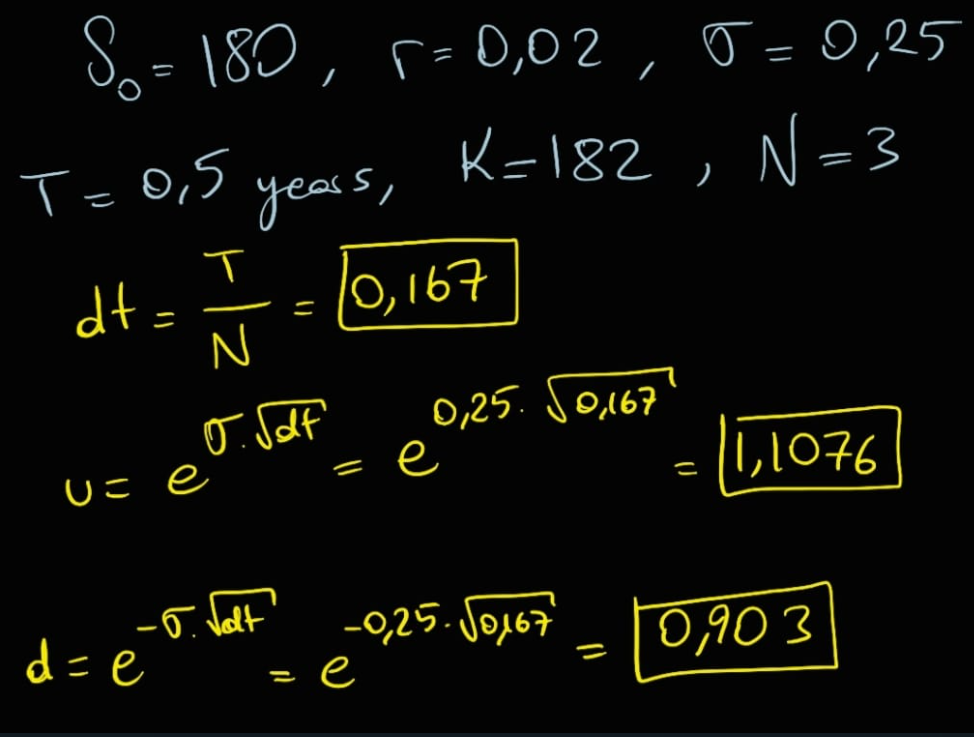

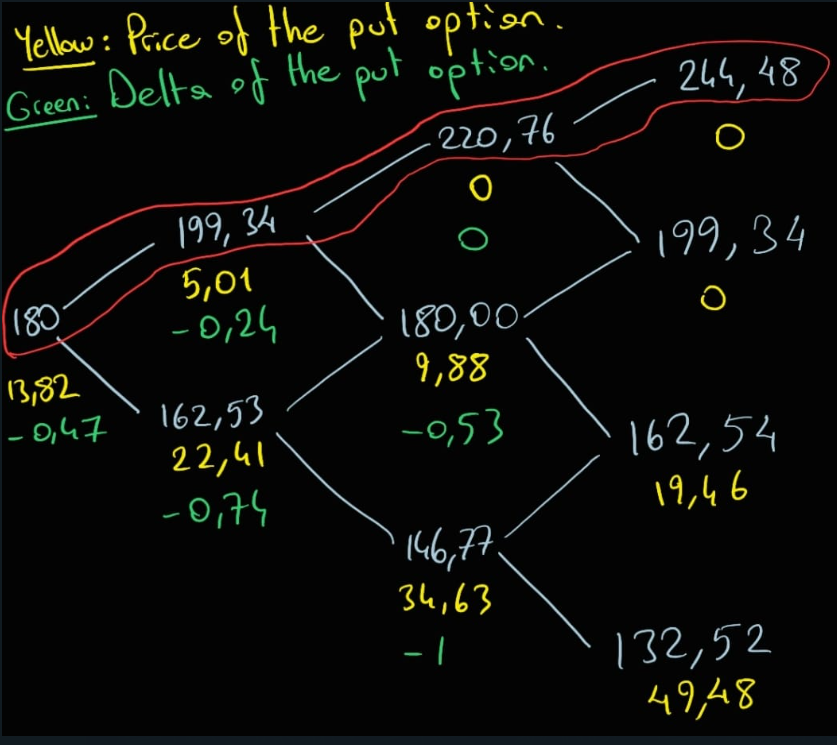

Choosing the red path above, for the European put option, we do the following at each timestep to dynamically hedge our **delta** exposure:

* at $t=0$ we **sell** $0.47$ units of the underlying asset and **buy** $98.42$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=1$ we **sell** $0.24$ units of the underlying asset and **buy** $52.85$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=2$ we **neither buy or sell** the asset or the bond as our delta exposure is 0 from selling the put.

**26) American Put Option**

In [94]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5        # Time to maturity (in years)
r = 0.02     # Risk-free rate
sigma = 0.25  # Volatility
N = 3       # Number of time steps
u = np.exp(sigma * np.sqrt(T/N))
d = np.exp(-sigma * np.sqrt(T/N))

put_price, P, S = american_option(180, 182, 0.5, 0.02, u, d, 3, opttype="P")
print("American put price at t=0 is", np.round(put_price, 2))
print("Asset prices in the tree:\n", np.round(S, 2))
print("American put prices in the tree:\n", np.round(P, 2))

American put price at t=0 is 13.98
Asset prices in the tree:
 [[180.     0.     0.     0.  ]
 [162.54 199.34   0.     0.  ]
 [146.77 180.   220.76   0.  ]
 [132.52 162.54 199.34 244.48]]
American put prices in the tree:
 [[13.98  0.    0.    0.  ]
 [22.71  5.01  0.    0.  ]
 [35.23  9.88  0.    0.  ]
 [49.48 19.46  0.    0.  ]]


$\Delta = \Large\frac{P_u - P_d}{S_u - S_d}$

In [95]:
delta_0 = np.round((5.01-22.71)/(199.34 - 162.53), 2)
delta_1 = np.round((0-9.88)/(220.76 - 180.00), 2)
delta_2 = np.round((0-0)/(244.48 - 199.34), 2)

print("delta at t=0:", delta_0)
print("delta at t=1:", delta_1)
print("delta at t=2:", delta_2)

delta at t=0: -0.48
delta at t=1: -0.24
delta at t=2: 0.0


In [96]:
bond_amount_0 = bond_amount(13.98, -0.48, 180)
bond_amount_1 = bond_amount(5.01, -0.24, 199.34)
bond_amount_2 = bond_amount(0, 0, 220.76)

print(f"Hold {np.round(bond_amount_0, 2)} units of risk-free bond at t=0")
print(f"Hold {np.round(bond_amount_1, 2)} units of risk-free bond at t=1")
print(f"Hold {np.round(bond_amount_2, 2)} units of risk-free bond at t=2")

Hold 100.38 units of risk-free bond at t=0
Hold 52.85 units of risk-free bond at t=1
Hold 0.0 units of risk-free bond at t=2


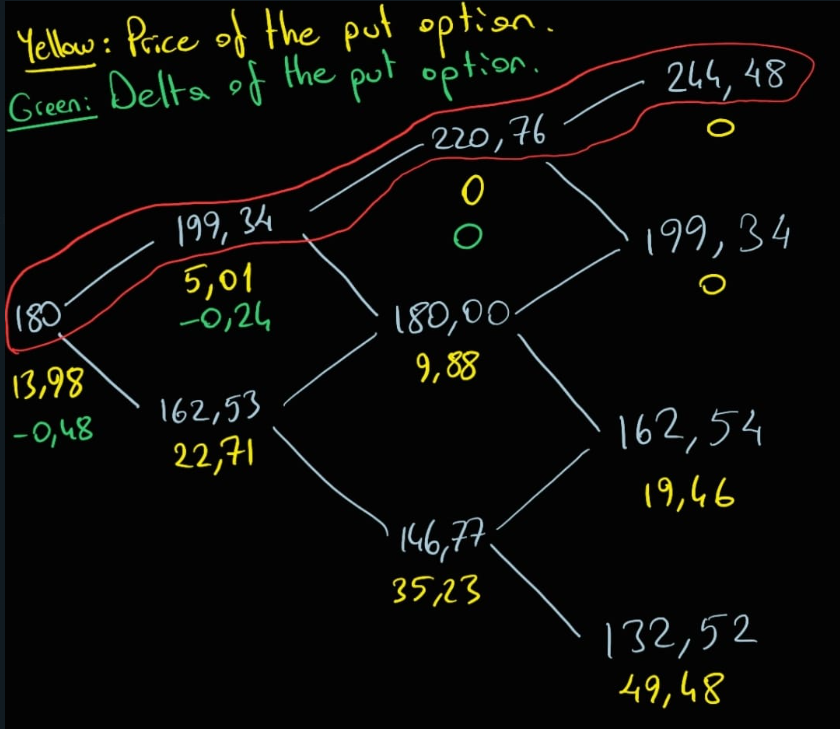

Choosing the red path above, for the American put option, we do the following at each timestep to dynamically hedge our **delta** exposure:

* at $t=0$ we sell $0.48$ units of the underlying assets and **buy** $100.38$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=1$ we sell $0.24$ units of the underlying assets and **buy** $52.85$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=2$ we neither buy or sell the asset or the bond as our delta exposure is 0 from selling the put.

**27) Asian Put Option**

In [97]:
import numpy as np

def asian_put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = 1 / u  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    P = np.zeros((N + 1, N + 1))  # Put prices
    S = np.zeros((N + 1, N + 1))  # Underlying prices
    Delta = np.zeros((N, N))  # Delta

    # Initialize stock prices at each node
    for j in range(N + 1):
        for i in range(j + 1):
            S[i, j] = S_ini * (u ** i) * (d ** (j - i))

    # Calculate option values at maturity
    for i in range(N + 1):
        avg_price = np.mean(S[:i + 1, N])
        P[i, N] = max(K - avg_price, 0)
    
    # Backward induction to calculate option prices and deltas
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            P[i, j] = np.exp(-r * dt) * (p * P[i + 1, j + 1] + (1 - p) * P[i, j + 1])
            avg_price_next_u = np.mean(S[:i + 2, j + 1])
            avg_price_next_d = np.mean(S[:i + 1, j + 1])
            P[i, j] = np.maximum(P[i, j], max(K - avg_price_next_d, 0))  # Early exercise for American option
            Delta[i, j] = (P[i + 1, j + 1] - P[i, j + 1]) / (S[i + 1, j + 1] - S[i, j + 1])
    
    return P[0, 0], P, S, Delta

# Example usage
S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5        # Time to maturity (in years)
r = 0.02     # Risk-free rate
sigma = 0.25  # Volatility
N = 3       # Number of time steps

asian_put_price, P, S, Delta = asian_put_option_delta(S_ini, K, T, r, sigma, N)

print("Asian put price at t=0 is", np.round(asian_put_price, 2))
print("Asset prices in the tree:\n", np.round(S, 2))
print("Asian put prices in the tree:\n", np.round(P, 2))
print("Delta values in the tree:\n", np.round(Delta, 2))

Asian put price at t=0 is 33.97
Asset prices in the tree:
 [[180.   162.54 146.77 132.52]
 [  0.   199.34 180.   162.54]
 [  0.     0.   220.76 199.34]
 [  0.     0.     0.   244.48]]
Asian put prices in the tree:
 [[33.97 41.97 49.48 49.48]
 [ 0.   25.91 34.47 34.47]
 [ 0.    0.   17.2  17.2 ]
 [ 0.    0.    0.    0.  ]]
Delta values in the tree:
 [[-0.44 -0.45 -0.5 ]
 [ 0.   -0.42 -0.47]
 [ 0.    0.   -0.38]]


In [98]:
bond_amount_0 = bond_amount(33.97, -0.44, 180)
bond_amount_1 = bond_amount(25.91, -0.42, 199.34)
bond_amount_2 = bond_amount(17.2, -0.38, 220.76)

print(f"Hold {np.round(bond_amount_0, 2)} units of risk-free bond at t=0")
print(f"Hold {np.round(bond_amount_1, 2)} units of risk-free bond at t=1")
print(f"Hold {np.round(bond_amount_2, 2)} units of risk-free bond at t=2")

Hold 113.17 units of risk-free bond at t=0
Hold 109.63 units of risk-free bond at t=1
Hold 101.09 units of risk-free bond at t=2


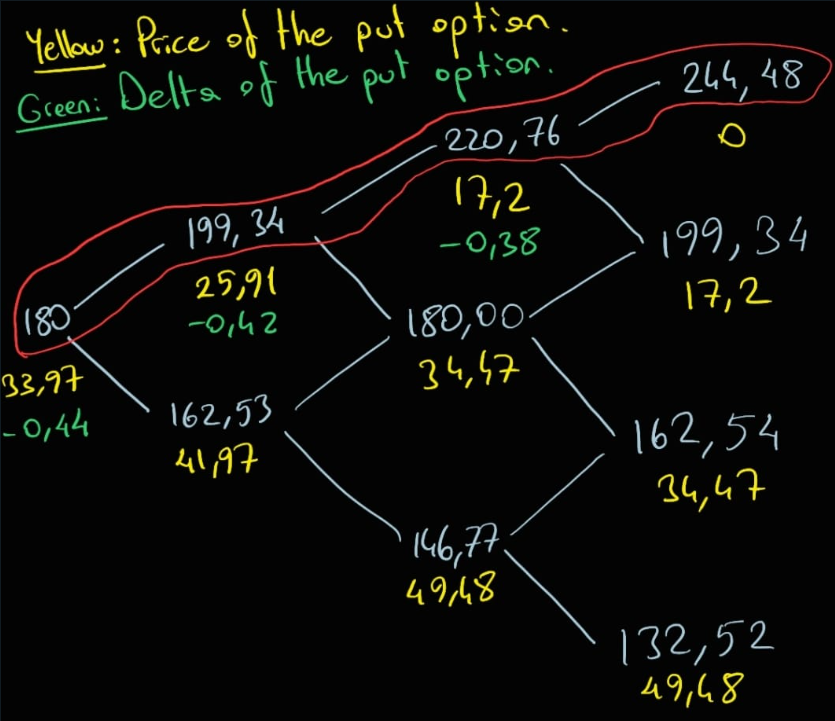

Choosing the red path above, for the Asian put option, we do the following at each timestep to dynamically hedge our **delta** exposure:

* at $t=0$ we sell $0.44$ units of the underlying assets and **buy** $113.17$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=1$ we sell $0.42$ units of the underlying assets and **buy** $109.63$ units of risk-free bond to hedge our delta exposure from selling the put.

* at $t=2$ we sell $0.38$ units of the underlying assets and **buy** $101.09$ units of risk-free bond to hedge our delta exposure from selling the put.

Option prices neatly organized in a table:

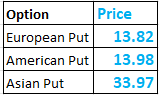